**THIS METHOD CRAWLS GOOGLE IMAGES.**


In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.parse
import os


def crawl_google_images(search_term, num_images):
    # Create a new directory for the search term
    dir_name = search_term.replace(" ", "_")
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

    # Set the base URL for the Google Images search
    base_url = "https://www.google.com/search?q="
    search_url = base_url + urllib.parse.quote_plus(search_term) + "&source=lnms&tbm=isch"

    # Send the HTTP GET request
    response = requests.get(search_url)
    response.raise_for_status()

    # Parse the HTML response
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all the images on the page
    images = soup.find_all("img", num_images)
    
    # Download the images
    # print(enumerate(images))
    for i, image in enumerate(images):
        # print(enumerate(images))
        try:
            # Get the image URL
            img_url = image["src"]

            # Open the image URL
            response = requests.get(img_url)
            response.raise_for_status()

            # Save the image to a file
            file_name = search_term.replace(" ", "_") + str(i) + ".jpg"
            with open(os.path.join(dir_name, file_name), "wb") as f:
                f.write(response.content)
        except:
            # Skip the image if there is any error
            continue

# Test the function with a search term and number of images
import requests
from bs4 import BeautifulSoup
import urllib.parse
import os

def crawl_google_images(search_term,dir):
    # Create a new directory for the search term
    #dir = search_term.replace(" ", "_")
    if not os.path.exists(dir):
        os.makedirs(dir)

    # Set the base URL for the Google Images search
    base_url = "https://www.google.com/search?q="
    search_url = base_url + urllib.parse.quote_plus(search_term) + "&source=lnms&tbm=isch"
    # Send the HTTP GET request
    response = requests.get(search_url)
    response.raise_for_status()

    # Parse the HTML response
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all the images on the page
    images = soup.find_all("img")

    # Download the images
    for i, image in enumerate(images):
      # index- value
        try:
            # Get the image URL
            img_url = image["src"]

            # Open the image URL
            response = requests.get(img_url)
            response.raise_for_status()

            # Save the image to a file
            file_name = search_term.replace(" ", "_") + str(i) + ".jpg"
            with open(os.path.join(dir, file_name), "wb") as f:
                f.write(response.content) # what is downloaded.
        except:
            # Skip the image if there is any error
            continue

# Test the function with a search term and number of images


colors = """
سفید
مشکی
خاکستری
نقره ای
نوک مدادی
قهوه ای
آبی
قرمز
زرد
صورتی
زرشکی
بادمجانی
سرمه ای
بژ
طلایی
سبز
نقرآبی
يشمى
مسی
ذغالی
زیتونی
اطلسی
طوسی
پوست پیازی""".split("\n")

cars = """ تیبا • پژو 206 • پراید • پژو پارس • سمند • دنا""".split("•")


for i in tqdm.tqdm(cars):
  i = i.replace(" ","")
  for j in colors:
    j = j.replace(" ","")
    dir = '/content/drive/MyDrive/Cars/'+i
    crawl_google_images(i+" "+ j,dir)



**CREATE MODEL INPUT AND OUTPUTS.**❗❗

In [ ]:
#CREATING X & Y 
import os
import tensorflow as tf;
root_path = '/content/drive/MyDrive/Cars';
car_ls=os.listdir(root_path)
X = []
Y = []
for c in car_ls:
  x = root_path + '/' + c;
  for v in os.listdir(x):
    mine_path = x + '/' + v;
    # print(mine_path)
    ax=tf.keras.utils.load_img(mine_path)
    ax = tf.io.read_file(mine_path);
    tensor1=tf.image.decode_image(ax, channels=3) 
    gscale_tensor = tf.image.rgb_to_grayscale(tensor1)
    resized_tensor=tf.image.resize(gscale_tensor, (100, 100))
    X.append(resized_tensor/255.0)

In [ ]:
for c in car_ls:
  for i in range(500):
    Y.append(c)

**IMPORT LIBS REQUIRED**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**THIS PART OF CODE DIVIDES THE MODEL INTO TRAIN AND VALIDATION**

In [ ]:

train_test_rate = 0.7;
X_TRAIN_ASLI = []
X_TEST_ASLI = []
Y_TRAIN_ASLI = []
Y_TEST_ASLI = []
for i in range(1,7):
  START_RANGE = (i - 1) * 500;
  END_RANGE = (i) * 500;
  DATASET1 = X[START_RANGE : END_RANGE]
  DATASET2 = Y[START_RANGE : END_RANGE]
  len_1 = int(train_test_rate * 500)


  train = DATASET1[:len_1]
  test = DATASET1[len_1:]
  X_TRAIN_ASLI += train;
  X_TEST_ASLI += test;


  train_y = DATASET2[: len_1]
  test_y = DATASET2[len_1:]
  Y_TRAIN_ASLI+=train_y;
  Y_TEST_ASLI+=test_y;


**THE FOLLOWING PART OF CODE MAKES Y FEATURES NUMERIC**

In [ ]:
car_list = list(set(Y_TEST_ASLI))
y_train_numeric = []
y_test_nimeric = []
for item in Y_TRAIN_ASLI:
  y_train_numeric.append(car_list.index(item))

for item in Y_TEST_ASLI:
  y_test_nimeric.append(car_list.index(item))
  


len(y_test_nimeric)

900

**FROM NOW ON WHAT IS HAPPENING IS JUST CREATING MODELS AND TESTING ON VALIDATION AND INPUT**

In [ ]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
CNN_model.add(layers.MaxPooling2D(2,2)) 
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu'))
CNN_model.add(layers.Conv2D(100, (3, 3), activation='leaky_relu')) #RELU Makes CNN nurons die, leaky relu resolves it.
CNN_model.add(layers.MaxPooling2D(5, 5))
CNN_model.add(layers.Conv2D(100, (3, 3), activation='leaky_relu'))



CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu')) 
CNN_model.add(layers.Dense(6, activation='softmax')) #fully connected layer.
#SO WHAT IS GOING TO BE DONE NEXT? 
#خروجی نهایی باید 6 کلاسه باشد.


# CNN_model.summary()
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNN_model.fit(tf.convert_to_tensor(X_TRAIN_ASLI), tf.convert_to_tensor(y_train_numeric), epochs=10, 
                    validation_data=(tf.convert_to_tensor(X_TEST_ASLI), tf.convert_to_tensor(y_test_nimeric)))


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 10s 44ms/step - loss: 1.7931 - accuracy: 0.1843 - val_loss: 1.7954 - val_accuracy: 0.1533
Epoch 2/10
66/66 [==============================] - 2s 34ms/step - loss: 1.7536 - accuracy: 0.2281 - val_loss: 1.7910 - val_accuracy: 0.2056
Epoch 3/10
66/66 [==============================] - 3s 38ms/step - loss: 1.6910 - accuracy: 0.2905 - val_loss: 1.7335 - val_accuracy: 0.2589
Epoch 4/10
66/66 [==============================] - 3s 39ms/step - loss: 1.5618 - accuracy: 0.3762 - val_loss: 1.6792 - val_accuracy: 0.3144
Epoch 5/10
66/66 [==============================] - 3s 39ms/step - loss: 1.3474 - accuracy: 0.4790 - val_loss: 1.6639 - val_accuracy: 0.3456
Epoch 6/10
66/66 [==============================] - 2s 34ms/step - loss: 1.1184 - accuracy: 0.5786 - val_loss: 1.7122 - val_accuracy: 0.3678
Epoch 7/10
66/66 [==============================] - 3s 39ms/step - loss: 0.8565 - accuracy: 0.6881 - val_loss: 1.8854 - val_accuracy: 0.3978
Epoch 8/10
66/66 [=====

**the above model underfits.**

In [ ]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
CNN_model.add(layers.MaxPooling2D(2,2)) 
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu'))
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu')) #RELU Makes CNN nurons die, leaky relu resolves it.
CNN_model.add(layers.MaxPooling2D(5, 5))
CNN_model.add(layers.Conv2D(100, (3, 3), activation='relu'))



CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu')) 
CNN_model.add(layers.Dense(6, activation='softmax')) #fully connected layer.
#SO WHAT IS GOING TO BE DONE NEXT? 
#خروجی نهایی باید 6 کلاسه باشد.


CNN_model.summary()
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNN_model.fit(tf.convert_to_tensor(X_TRAIN_ASLI), tf.convert_to_tensor(y_train_numeric), epochs=10, 
                    validation_data=(tf.convert_to_tensor(X_TEST_ASLI), tf.convert_to_tensor(y_test_nimeric)))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 100)       1000      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       90100     
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 100)       90100     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 100)        

***50% acuracy means a good model, since we are having 6 categories and if we'd like to do it randomly, we would be 16% accurate.***


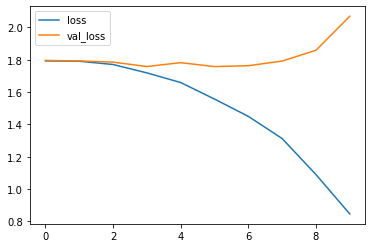

In [ ]:
import pandas as pd
matrix_dataframe = pd.DataFrame(history.history)
matrix_dataframe[["loss", "val_loss"]].plot()

**we are doing things over and over expecting diffrent results, so why not to create a function to report it more clearly?** ⏰

In [ ]:
import pandas as pd
def report_model(CNN_model):
  CNN_model.summary()
  CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = CNN_model.fit(tf.convert_to_tensor(X_TRAIN_ASLI), tf.convert_to_tensor(y_train_numeric), epochs=10, 
                    validation_data=(tf.convert_to_tensor(X_TEST_ASLI), tf.convert_to_tensor(y_test_nimeric)))
  matrix_dataframe = pd.DataFrame(history.history)
  ax1 =  matrix_dataframe[["loss", "val_loss"]].plot()
  ax1.set_ylabel("Loss")
  ax1.set_xlabel("epoch NUMBER")
  ax1.legend(["Train", "Validation"])
  ax2 =  matrix_dataframe[["accuracy", "val_accuracy"]].plot()
  
  ax2.set_xlabel("epoch NUMBER")
  ax2.set_ylabel("Accuracy")
  ax2.legend(["Train", "Validation"])
  

Adding an extra layer of Leaky relu

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 100)       1000      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 100)       90100     
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 100)       90100     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 100)        

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 3s 37ms/step - loss: 1.7949 - accuracy: 0.1467 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/10
66/66 [==============================] - 2s 34ms/step - loss: 1.7921 - accuracy: 0.1605 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/10
66/66 [==============================] - 3s 39ms/step - loss: 1.7920 - accuracy: 0.1495 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/10
66/66 [==============================] - 3s 39ms/step - loss: 1.7924 - accuracy: 0.1500 - val_loss: 1.7917 - val_accuracy: 0.1867
Epoch 5/10
66/66 [==============================] - 2s 34ms/step - loss: 1.7916 - accuracy: 0.1648 - val_loss: 1.7889 - val_accuracy: 0.1889
Epoch 6/10
66/66 [==============================] - 2s 34ms/step - loss: 1.7881 - accuracy: 0.1890 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 7/10
66/66 [==============================] - 3s 38ms/step - loss: 1.7926 - accuracy: 0.1667 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 8/10
66/66 [======

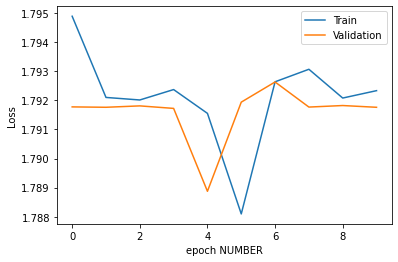

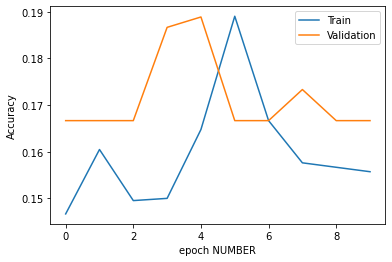

In [ ]:

m1 = models.Sequential()
m1.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
m1.add(layers.MaxPooling2D(2,2)) 
m1.add(layers.Conv2D(100, (3, 3), activation='relu'))
m1.add(layers.Conv2D(100, (3, 3), activation='relu')) #RELU Makes CNN nurons die, leaky relu resolves it.
m1.add(layers.MaxPooling2D(5, 5))
m1.add(layers.Conv2D(100, (3, 3), activation='relu'))
m1.add(layers.Conv2D(100, (3, 3), activation='leaky_relu'))
m1.add(layers.Flatten())
m1.add(layers.Dense(64, activation='relu')) 
m1.add(layers.Dense(6, activation='softmax')) 
report_model(m1)


**Since prev model overfits, we'd like to reduce layers.**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 98, 98, 100)       1000      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 100)       160100    
                                                                 
 conv2d_15 (Conv2D)          (None, 44, 44, 100)       90100     
                                                                 
 flatten_3 (Flatten)         (None, 193600)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                12390464  
                                                      

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 4s 51ms/step - loss: 1.8729 - accuracy: 0.1705 - val_loss: 1.7877 - val_accuracy: 0.2111
Epoch 2/10
66/66 [==============================] - 3s 41ms/step - loss: 1.7823 - accuracy: 0.2124 - val_loss: 1.7833 - val_accuracy: 0.2211
Epoch 3/10
66/66 [==============================] - 3s 45ms/step - loss: 1.7191 - accuracy: 0.2838 - val_loss: 1.7429 - val_accuracy: 0.2589
Epoch 4/10
66/66 [==============================] - 3s 41ms/step - loss: 1.4927 - accuracy: 0.4176 - val_loss: 1.7663 - val_accuracy: 0.2867
Epoch 5/10
66/66 [==============================] - 3s 45ms/step - loss: 1.0457 - accuracy: 0.6171 - val_loss: 2.0046 - val_accuracy: 0.3544
Epoch 6/10
66/66 [==============================] - 3s 41ms/step - loss: 0.5160 - accuracy: 0.8324 - val_loss: 2.5849 - val_accuracy: 0.3656
Epoch 7/10
66/66 [==============================] - 3s 46ms/step - loss: 0.1940 - accuracy: 0.9486 - val_loss: 3.3142 - val_accuracy: 0.3567
Epoch 8/10
66/66 [======

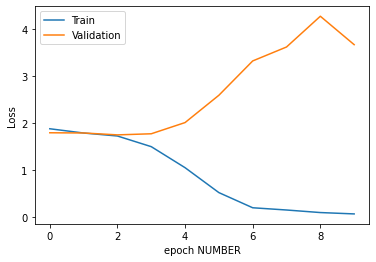

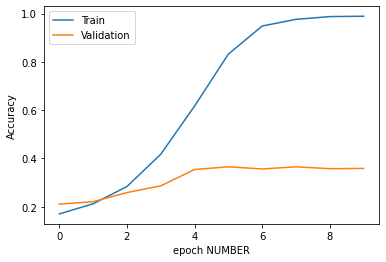

In [ ]:
m1 = models.Sequential()
m1.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
m1.add(layers.MaxPooling2D(2,2)) 
m1.add(layers.Conv2D(100, (4,4), activation='relu'))
# m1.add(layers.Conv2D(100, (3, 3), activation='relu'))
# m1.add(layers.MaxPooling2D(5, 5))
m1.add(layers.Conv2D(100, (3, 3), activation='relu'))
# m1.add(layers.Conv2D(100, (3, 3), activation='leaky_relu'))
m1.add(layers.Flatten())
m1.add(layers.Dense(64, activation='relu')) 
m1.add(layers.Dense(6, activation='softmax')) 
m1.add(layers.Dropout(0.2))
report_model(m1)

**Checking if Smaller conv layer and then increasing it to high will help or Not**

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 98, 98, 100)       1000      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 49, 49, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 48, 48, 100)       40100     
                                                                 
 conv2d_82 (Conv2D)          (None, 46, 46, 100)       90100     
                                                                 
 conv2d_83 (Conv2D)          (None, 43, 43, 100)       160100    
                                                                 
 flatten_20 (Flatten)        (None, 184900)            0         
                                                     

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 4s 59ms/step - loss: 30.3310 - accuracy: 0.1643 - val_loss: 1.8136 - val_accuracy: 0.1611
Epoch 2/10
66/66 [==============================] - 3s 49ms/step - loss: 1.7672 - accuracy: 0.2052 - val_loss: 1.7787 - val_accuracy: 0.2178
Epoch 3/10
66/66 [==============================] - 3s 49ms/step - loss: 1.7028 - accuracy: 0.2643 - val_loss: 1.8883 - val_accuracy: 0.2389
Epoch 4/10
66/66 [==============================] - 3s 49ms/step - loss: 1.6574 - accuracy: 0.2843 - val_loss: 1.7931 - val_accuracy: 0.1678
Epoch 5/10
66/66 [==============================] - 3s 53ms/step - loss: 1.6738 - accuracy: 0.2757 - val_loss: 1.8777 - val_accuracy: 0.2644
Epoch 6/10
66/66 [==============================] - 4s 54ms/step - loss: 1.4544 - accuracy: 0.4052 - val_loss: 2.0686 - val_accuracy: 0.2900
Epoch 7/10
66/66 [==============================] - 4s 54ms/step - loss: 1.2680 - accuracy: 0.4729 - val_loss: 2.0149 - val_accuracy: 0.2811
Epoch 8/10
66/66 [=====

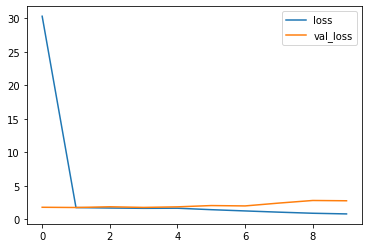

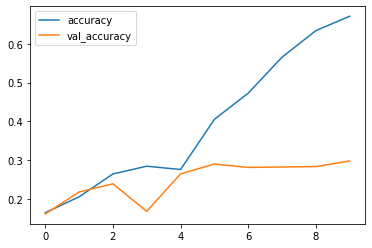

In [ ]:
m1 = models.Sequential()
m1.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
m1.add(layers.MaxPooling2D(2,2)) 
m1.add(layers.Conv2D(100, (2,2), activation='relu'))
m1.add(layers.Conv2D(100, (3,3), activation='relu'))
m1.add(layers.Conv2D(100, (4,4), activation='relu'))
# m1.add(layers.Conv2D(100, (3, 3), activation='leaky_relu'))
m1.add(layers.Flatten())
m1.add(layers.Dense(64, activation='relu')) 
m1.add(layers.Dense(6, activation='softmax')) 
report_model(m1)

Installing mlflow

In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 98, 98, 100)       1000      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 100)       40100     
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 46, 100)       90100     
                                                                 
 conv2d_23 (Conv2D)          (None, 43, 43, 100)       160100    
                                                                 
 flatten_5 (Flatten)         (None, 184900)            0         
                                                      

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 4s 51ms/step - loss: 1.8173 - accuracy: 0.1548 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/10
66/66 [==============================] - 3s 48ms/step - loss: 1.7919 - accuracy: 0.1600 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/10
66/66 [==============================] - 3s 52ms/step - loss: 1.7919 - accuracy: 0.1610 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/10
66/66 [==============================] - 4s 54ms/step - loss: 1.7919 - accuracy: 0.1476 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/10
66/66 [==============================] - 3s 53ms/step - loss: 1.7919 - accuracy: 0.1633 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
66/66 [==============================] - 3s 49ms/step - loss: 1.7919 - accuracy: 0.1571 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/10
66/66 [==============================] - 3s 49ms/step - loss: 1.7919 - accuracy: 0.1619 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 8/10
66/66 [======

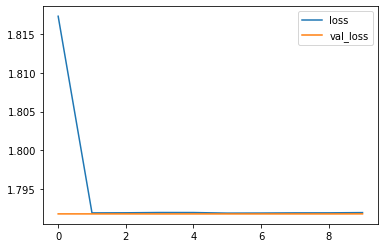

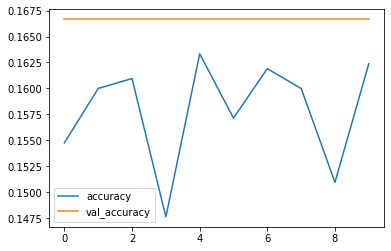

In [ ]:
import mlflow
import pandas as pd
def report_model_mlflw(CNN_model):
  CNN_model.summary()
  CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = CNN_model.fit(tf.convert_to_tensor(X_TRAIN_ASLI), tf.convert_to_tensor(y_train_numeric), epochs=10, 
                    validation_data=(tf.convert_to_tensor(X_TEST_ASLI), tf.convert_to_tensor(y_test_nimeric)))
  matrix_dataframe = pd.DataFrame(history.history)
  matrix_dataframe[["loss", "val_loss"]].plot()
  # mlflow.log_text("hi")
  # mlflow.log_metrics("accuracy:" + matrix_dataframe(["accuracy"]))
  matrix_dataframe[["accuracy", "val_accuracy"]].plot()

with mlflow.start_run():
      m1 = models.Sequential()
      m1.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100,1))) #this is a CONV2D with RELU
      m1.add(layers.MaxPooling2D(2,2)) 
      m1.add(layers.Conv2D(100, (2,2), activation='relu'))
      m1.add(layers.Conv2D(100, (3,3), activation='relu'))
      m1.add(layers.Conv2D(100, (4,4), activation='relu'))
      # m1.add(layers.Conv2D(100, (3, 3), activation='leaky_relu'))
      m1.add(layers.Flatten())
      m1.add(layers.Dense(64, activation='relu')) 
      m1.add(layers.Dense(6, activation='softmax')) 
      report_model_mlflw(m1)


In [ ]:
mlflow ui